In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import linalg

from scipy.sparse import dia_matrix, coo_matrix
from scipy.sparse.linalg import eigs

from cmath import sqrt

from time import sleep
from IPython.display import clear_output

from mpl_toolkits.mplot3d import Axes3D

### A

In [2]:
def gen_in_shape(N, padding, L, rectangle, circle):
    """
    Generates a 2D array filled with bools that tell if cell is in shape
    """
    
    # Construct 2D array with booleans of whether cell in shape
    in_shape = np.full((N+2*padding,N+2*padding), True)
    
    if not circle and not rectangle:
        # Put padding on False
        for j in range(N+2*padding):
            for i in range(N+2*padding):
                if j==0 or j==N+2*padding-1:
                    in_shape[j,i] = False
                if i==0 or i==N+2*padding-1:
                    in_shape[j,i] = False
        
    elif circle:
        center = int(N/2)+padding
        
        for j in range(0, N+2*padding):
            for i in range(0, N+2*padding):
                dist = np.sqrt((i-center)**2+(j-center)**2)
                if dist > int(N/2):
                    in_shape[j,i] = False
                
    elif rectangle:
        # Put padding on False
        in_shape = np.full((2*N+2*padding, N+2*padding), True)
        for j in range(2*N+2*padding):
            for i in range(N+2*padding):
                if j==0 or j==2*N+2*padding-1:
                    in_shape[j,i] = False
                if i==0 or i==N+2*padding-1:
                    in_shape[j,i] = False

    return in_shape

[[-100.   25.    0.    0.    0.   25.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.]
 [  25. -100.   25.    0.    0.    0.   25.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.]
 [   0.   25. -100.   25.    0.    0.    0.   25.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.]
 [   0.    0.   25. -100.   25.    0.    0.    0.   25.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.]
 [   0.    0.    0.   25. -100.    0.    0.    0.    0.   25.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.]
 [  25.    0.    0.    0.    0. -100.   25.    0.    0.    0.   25.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.]
 [   0.   25.    0.    0.    0.   25. -100.   25.    0.   

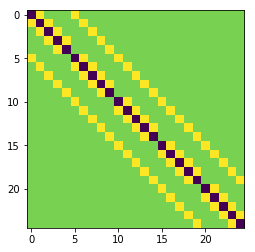

In [22]:
def gen_matrix(N, L=1, radius=0.5, K=-1, padding=1, rectangle=False, circle=False):
    """
    [3.1A] Generate matrix version
    """
    in_shape = gen_in_shape(N, padding, L, rectangle, circle)
    
#     plt.imshow(in_shape)
#     plt.show()
    
    dx = L/N
    
    # Set up M matrix and b vector
    M = np.zeros((N**2, N**2))
#     b = np.zeros(N**2)
    
    height_shape = N 
    if rectangle:
        M = np.zeros(((2*N**2, 2*N**2)))
        b = np.zeros(2*N**2)
        height_shape = 2*N
    
    cellcount = 0
    for j in range(height_shape):
        for i in range(N):
    
            M[cellcount, cellcount] = -4
    
            # Iterate over neighbors:
            if in_shape[j-1+padding, i+padding]:
                M[cellcount, cellcount-N] = 1
                    
            if in_shape[j+1+padding, i+padding]:
                if cellcount+N+padding < len(M[cellcount])+1:
                    M[cellcount, cellcount+N] = 1
                    
            if in_shape[j+padding, i+1+padding]:
                M[cellcount, cellcount+1] = 1  
                    
            if in_shape[j+padding, i-1+padding]:
                M[cellcount, cellcount-1] = 1
                
            cellcount += 1
    
    return M*(1/dx**2)

N = 5
M = gen_matrix(N, L=1, circle=False)
print(M)
plt.imshow(M)
plt.show()

### B

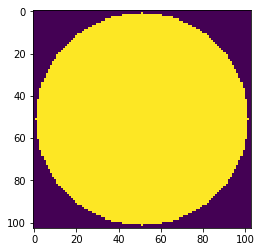

In [14]:
N = 101
K=-1
L=1
# M_sq = gen_matrix(N, L=1)
# print(M_sq.shape)
# print(M_sq)
# eigenval_sq = eigsh(dia_matrix(M_sq))
# eigenval_sq = linalg.eig(M_sq)
# eigenval_sq = eigs(coo_matrix(M_sq), which='SM')
# print(eigenval_sq)

M_ci = gen_matrix(N, L=1, circle=True)
eigenval_ci = eigs(coo_matrix(M_ci), which='SM')

# M_rt = gen_matrix(N, L=1, rectangle=True)
# eigenval_rt = eigs(coo_matrix(M_rt), which='SM')

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.


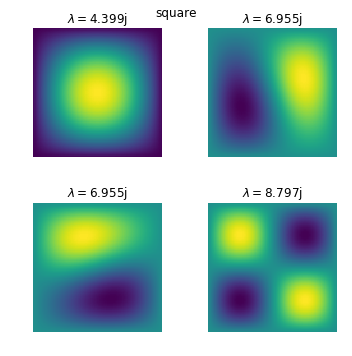

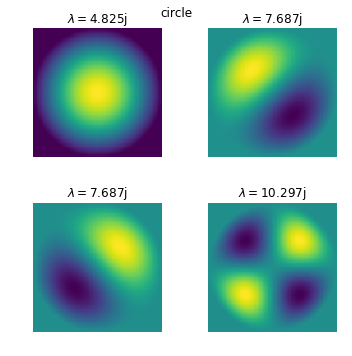

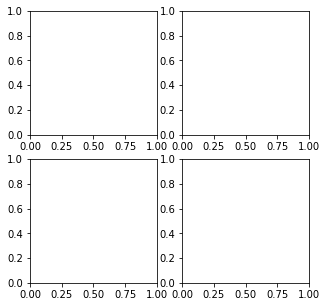

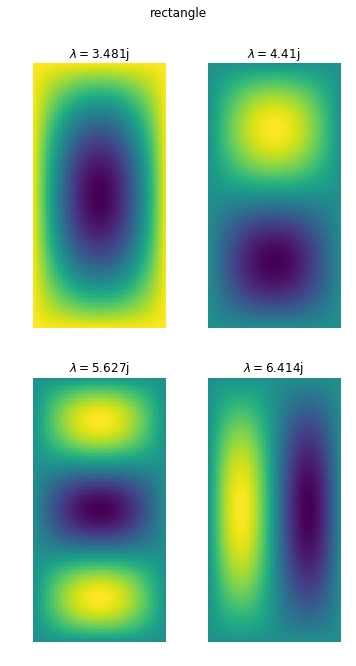

In [20]:
def plot_eigenvec_to_grid(eigen, N, name, rectangle=False):
    eigenval = eigen[0]
    eigenvec = eigen[1].T
    
#     print(eigenval)
#     print(eigenvec)
    
    # Get the smallest eigenvalues
    small_eigenvals = [sorted([e for e in eigenval if e < 0])[::-1][i] for i in range(4)]
    
    small_eigenvecs = [eigenvec[np.where(eigenval==i)] for i in small_eigenvals]
    
#     print(small_eigenvecs)
    
    fig, axes = plt.subplots(2,2,figsize=(5,5))
    if rectangle:
        fig, axes = plt.subplots(2,2,figsize=(5,10))  
    
    fig.suptitle(name)
    
    for i,plot in enumerate([(0,0), (0,1), (1,0), (1,1)]):
        
#         print(small_eigenvecs[i])
        
        y = []
        if not rectangle:
            y = np.real(np.reshape(small_eigenvecs[i], (N,N)))
        else:
            y = np.real(np.reshape(small_eigenvecs[i], (2*N,N)))
            
        T = np.array([[comp_T(t, small_eigenvals[i]) for j in range(y.shape[1])] 
                       for t in range(y.shape[0])])
        
#         axes[plot[0], plot[1]].imshow(y*T)
        axes[plot[0], plot[1]].imshow(y)
        axes[plot[0], plot[1]].axis('off')
        axes[plot[0], plot[1]].set_title('$\lambda= $'+str(round(np.sqrt(small_eigenvals[i]),3)))
    
    plt.tight_layout()
    if name=='rectangle':
        plt.subplots_adjust(hspace=-0.1)
#     plt.savefig(f'{name}_eigenfreq.pdf', bbox_inches='tight')
    plt.show()

plot_eigenvec_to_grid(eigenval_sq, N, 'square')

plot_eigenvec_to_grid(eigenval_ci, N, 'circle')

plot_eigenvec_to_grid(eigenval_rt, N, 'rectangle', rectangle=True)

In [38]:
all_L = np.arange(1,11)
all_max = []
all_min = []
all_eigenval = []

N = 101

for L in all_L:
    M_sq = gen_matrix(N, L=L)
    eigenval_sq = eigs(coo_matrix(M_sq), k=N-1, which='SM')
    
    
    print(eigenval_sq[0].shape)
    all_eigenval += [np.sqrt(-1*eigenval_sq[0])]
    all_max += [max(np.sqrt(-1*eigenval_sq[0]))]
    all_min += [min(np.sqrt(-1*eigenval_sq[0]))]

(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)


(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)


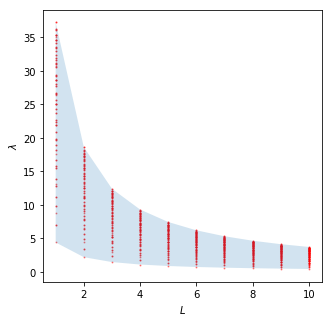

In [49]:
fig = plt.subplots(figsize=(5,5))
for i,L in enumerate(all_L):
    print(all_eigenval[i].shape)
    plt.scatter([L for i in range(N-1)], all_eigenval[i], color='red', 
                s=1, alpha=0.4)
plt.fill_between(all_L, all_max, all_min, alpha=0.2)
plt.xlabel('$L$')
plt.ylabel('$\lambda$')
plt.savefig('eigenfreq_spectrum.pdf', bbox_inches='tight')
plt.show()

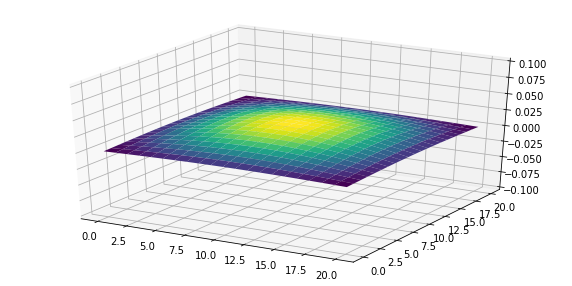

In [105]:
def comp_T(t, eigenfreq, A=1, B=1, c=1):
    return np.real(A*np.cos(c*eigenfreq*t) + B*np.sin(c*eigenfreq*t))

def animate(name, N, timesteps, rectangle=False, circle=False):

    M = gen_matrix(N)
    eigenval_res = eigs(coo_matrix(M), which='SM')
    
    eigenval = eigenval_res[0]
    eigenvec = eigenval_res[1].T
    
    # Get the smallest eigenvalues
    small_eigenvals = [sorted([e for e in eigenval if e < 0])[::-1][i] for i in range(4)]
    v0 = np.real([eigenvec[np.where(eigenval==i)] for i in small_eigenvals][0].reshape((N,N)))
    eigenfreq = np.sqrt(-1*small_eigenvals[0])
    
#     print(comp_T(0, eigenfreq))

    all_U = [v0*comp_T(0, eigenfreq)]
    
#     X = np.array([np.arange(0, N) for i in range(N)])
    X = np.array([[i for j in range(N)] for i in range(N)])
    Y = np.array([np.arange(0, N) for i in range(N)])

    fig = plt.figure(figsize=(10,5))
    ax = plt.axes(projection='3d')

    ax.plot_surface(X, Y, all_U[-1] ,cmap='viridis', edgecolor='none')
    ax.set_zlim(zmin=-0.1, zmax=0.1)
    plt.show()
    
    for t in np.arange(1,timesteps,0.05):
        
        T = comp_T(t, eigenfreq)
        all_U += [v0*T]
        clear_output(wait=True)
        
        fig = plt.figure(figsize=(10,5))
        ax = plt.axes(projection='3d')
        ax.set_zlim(zmin=-0.1, zmax=0.1)
        ax.plot_surface(X, Y, all_U[-1] ,cmap='viridis', edgecolor='none')
        plt.show()

N = 21
timesteps = 100
animate('square', N, timesteps)